<div style="background-color: #FFFFFF; color: black; padding: 11px;">
<h1 style="font-size: 25px;">DATA SCIENCE</h1>
<h2 style="font-size: 20px;">MACHINE LEARNING - SoSe 24</h2>
<i>BERRANUR CANBEY</i>
</div>

# Task 1: The Story

I am a data scientist at an urban water management organization, where concentrations of various chemical and biological substances are analyzed to continuously monitor the city's water quality and protect public health. These analyses are vital to determine whether the water is safe and to take the necessary measures.

In this project, I will focus on predicting whether water is safe or not using classification algorithms. My goal is to develop a model that, based on the concentrations of harmful substances in the water, determines whether the water is safe and potable.

 - Context: Water samples are regularly taken from various parts of the city and analyzed in laboratories. These analyses measure the concentrations of substances such as aluminum, ammonia, arsenic and cadmium in the water. It is also determined whether the water contains bacteria and viruses.

 - Experiment Plan: Using the collected data, a classification model will be developed to predict whether the water is safe or not. This model will determine whether the water is safe (1) or unsafe (0) by analyzing whether the harmful substances are above the set limits.

 - The Value: In addition to contributing to public health, this study aims to promote efficient management of water resources and increase public confidence in access to clean water.

# Task 2: The Data

##### **Data:** https://www.kaggle.com/datasets/mssmartypants/water-quality/data
##### The Water Quality data contains concentrations of various chemical and biological substances in water. Each of these substances indicates that water is unsafe for drinking when it is above certain thresholds.

The dataset has the following features:

- Aluminium - Dangerous threshold: > 2.8 mg/L
- Ammonia - Dangerous threshold: > 32.5 mg/L
- Arsenic - Dangerous threshold: > 0.01 mg/L
- Barium - Dangerous threshold: > 2 mg/L
- Cadmium - Dangerous threshold: > 0.005 mg/L
- Chloramine - Dangerous threshold: > 4 mg/L
- Chromium - Dangerous threshold: > 0.1 mg/L
- Copper - Dangerous threshold: > 1.3 mg/L
- Fluoride - Dangerous threshold: > 1.5 mg/L
- Bacteria - Dangerous threshold: > 0
- Viruses - Dangerous threshold: > 0
- Lead - Dangerous threshold: > 0.015 mg/L
- Nitrates - Dangerous threshold: > 10 mg/L
- Nitrites - Dangerous threshold: > 1 mg/L
- Mercury - Dangerous threshold: > 0.002 mg/L
- Perchlorate - Dangerous threshold: > 56 mg/L
- Radium - Dangerous threshold: > 5 mg/L
- Selenium - Dangerous threshold: > 0.5 mg/L
- Silver - Dangerous threshold: > 0.1 mg/L
- Uranium - Dangerous threshold: > 0.3 mg/L
- Water Safety (is_safe) - Target variable {0 - not safe to drink, 1 - safe to drink}

This dataset is suitable for the project as it provides all the necessary features and target information required to build a classification model for predicting water safety. It aligns with the public health objective, supports the experimental plan. The inclusion of both chemical and biological contaminants ensures comprehensive coverage of potential water safety hazards, making the model more reliable and useful in real-world applications.

### Importing Necessary Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from tabulate import tabulate
from sklearn.inspection import permutation_importance


dataset = pd.read_csv("water_quality.csv")

display(dataset.head())

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [3]:
display(dataset.tail())

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7994,0.05,7.78,0.00,1.95,0.04,0.10,0.03,0.03,1.37,0.0,...,0.197,14.29,1.0,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.01,0.45,0.02,0.02,1.48,0.0,...,0.031,10.27,1.0,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.03,0.05,0.05,0.02,0.91,0.0,...,0.182,15.92,1.0,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.00,2.00,0.00,0.09,0.00,0.0,...,0.000,0.00,0.0,0.000,0.00,0.00,0.00,0.00,0.00,1
7998,0.04,6.85,0.01,0.70,0.03,0.05,0.01,0.03,1.00,0.0,...,0.182,15.92,1.0,0.000,1.35,4.84,0.00,0.04,0.05,1


In [4]:
print(dataset.shape)

(7999, 21)


In [5]:
print(dataset.columns)

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')


# Task 3: IDA

- Display of data types of columns and missing values in columns :

In [6]:
dataset.info()    # The situation that causes the data type of the 'ammonia' column to be object will be corrected in the next steps.
                  # Considering that the is_safe column is a categorical variable, it will be converted to int type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

- Some basic statistics (mean, standart deviation, minimum, maximum etc.) : 

In [7]:
dataset.describe().T 

,count,mean,std,min,25%,50%,75%,max
aluminium,7999.0,0.666158,1.265145,0.0,0.040,0.070,0.280,5.05
arsenic,7999.0,0.161445,0.252590,0.0,0.030,0.050,0.100,1.05
barium,7999.0,1.567715,1.216091,0.0,0.560,1.190,2.480,4.94
cadmium,7999.0,0.042806,0.036049,0.0,0.008,0.040,0.070,0.13
chloramine,7999.0,2.176831,2.567027,0.0,0.100,0.530,4.240,8.68
chromium,7999.0,0.247226,0.270640,0.0,0.050,0.090,0.440,0.90
copper,7999.0,0.805857,0.653539,0.0,0.090,0.750,1.390,2.00
flouride,7999.0,0.771565,0.435373,0.0,0.405,0.770,1.160,1.50
bacteria,7999.0,0.319665,0.329485,0.0,0.000,0.220,0.610,1.00
viruses,7999.0,0.328583,0.378096,0.0,0.002,0.008,0.700,1.00


# Task 4: EDA and Preprocessing

- First, I marked the invalid values in the 'ammonia' column as NaN. Then I removed these rows from the dataset as this was observed in only 3 rows.

In [8]:
dataset['ammonia'] = pd.to_numeric(dataset['ammonia'], errors='coerce')
dataset.dropna(subset=['ammonia'], inplace=True)

- Then, since the 'is_safe' column is a categorical variable, I converted it to int data type.

In [9]:
dataset['is_safe'] = dataset['is_safe'].astype(int)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

In [11]:
dataset.nunique()

aluminium       495
ammonia        2563
arsenic         107
barium          480
cadmium          23
chloramine      812
chromium         91
copper          201
flouride        151
bacteria        101
viruses          61
lead            200
nitrates       1803
nitrites        280
mercury          11
perchlorate    2999
radium          735
selenium         11
silver           51
uranium          10
is_safe           2
dtype: int64

In [12]:
dataset.describe().T 

,count,mean,std,min,25%,50%,75%,max
aluminium,7996.0,0.666396,1.265323,0.00,0.0400,0.070,0.2800,5.05
ammonia,7996.0,14.278212,8.878930,-0.08,6.5775,14.130,22.1325,29.84
arsenic,7996.0,0.161477,0.252632,0.00,0.0300,0.050,0.1000,1.05
barium,7996.0,1.567928,1.216227,0.00,0.5600,1.190,2.4825,4.94
cadmium,7996.0,0.042803,0.036049,0.00,0.0080,0.040,0.0700,0.13
chloramine,7996.0,2.177589,2.567210,0.00,0.1000,0.530,4.2400,8.68
chromium,7996.0,0.247300,0.270663,0.00,0.0500,0.090,0.4400,0.90
copper,7996.0,0.805940,0.653595,0.00,0.0900,0.750,1.3900,2.00
flouride,7996.0,0.771646,0.435423,0.00,0.4075,0.770,1.1600,1.50
bacteria,7996.0,0.319714,0.329497,0.00,0.0000,0.220,0.6100,1.00


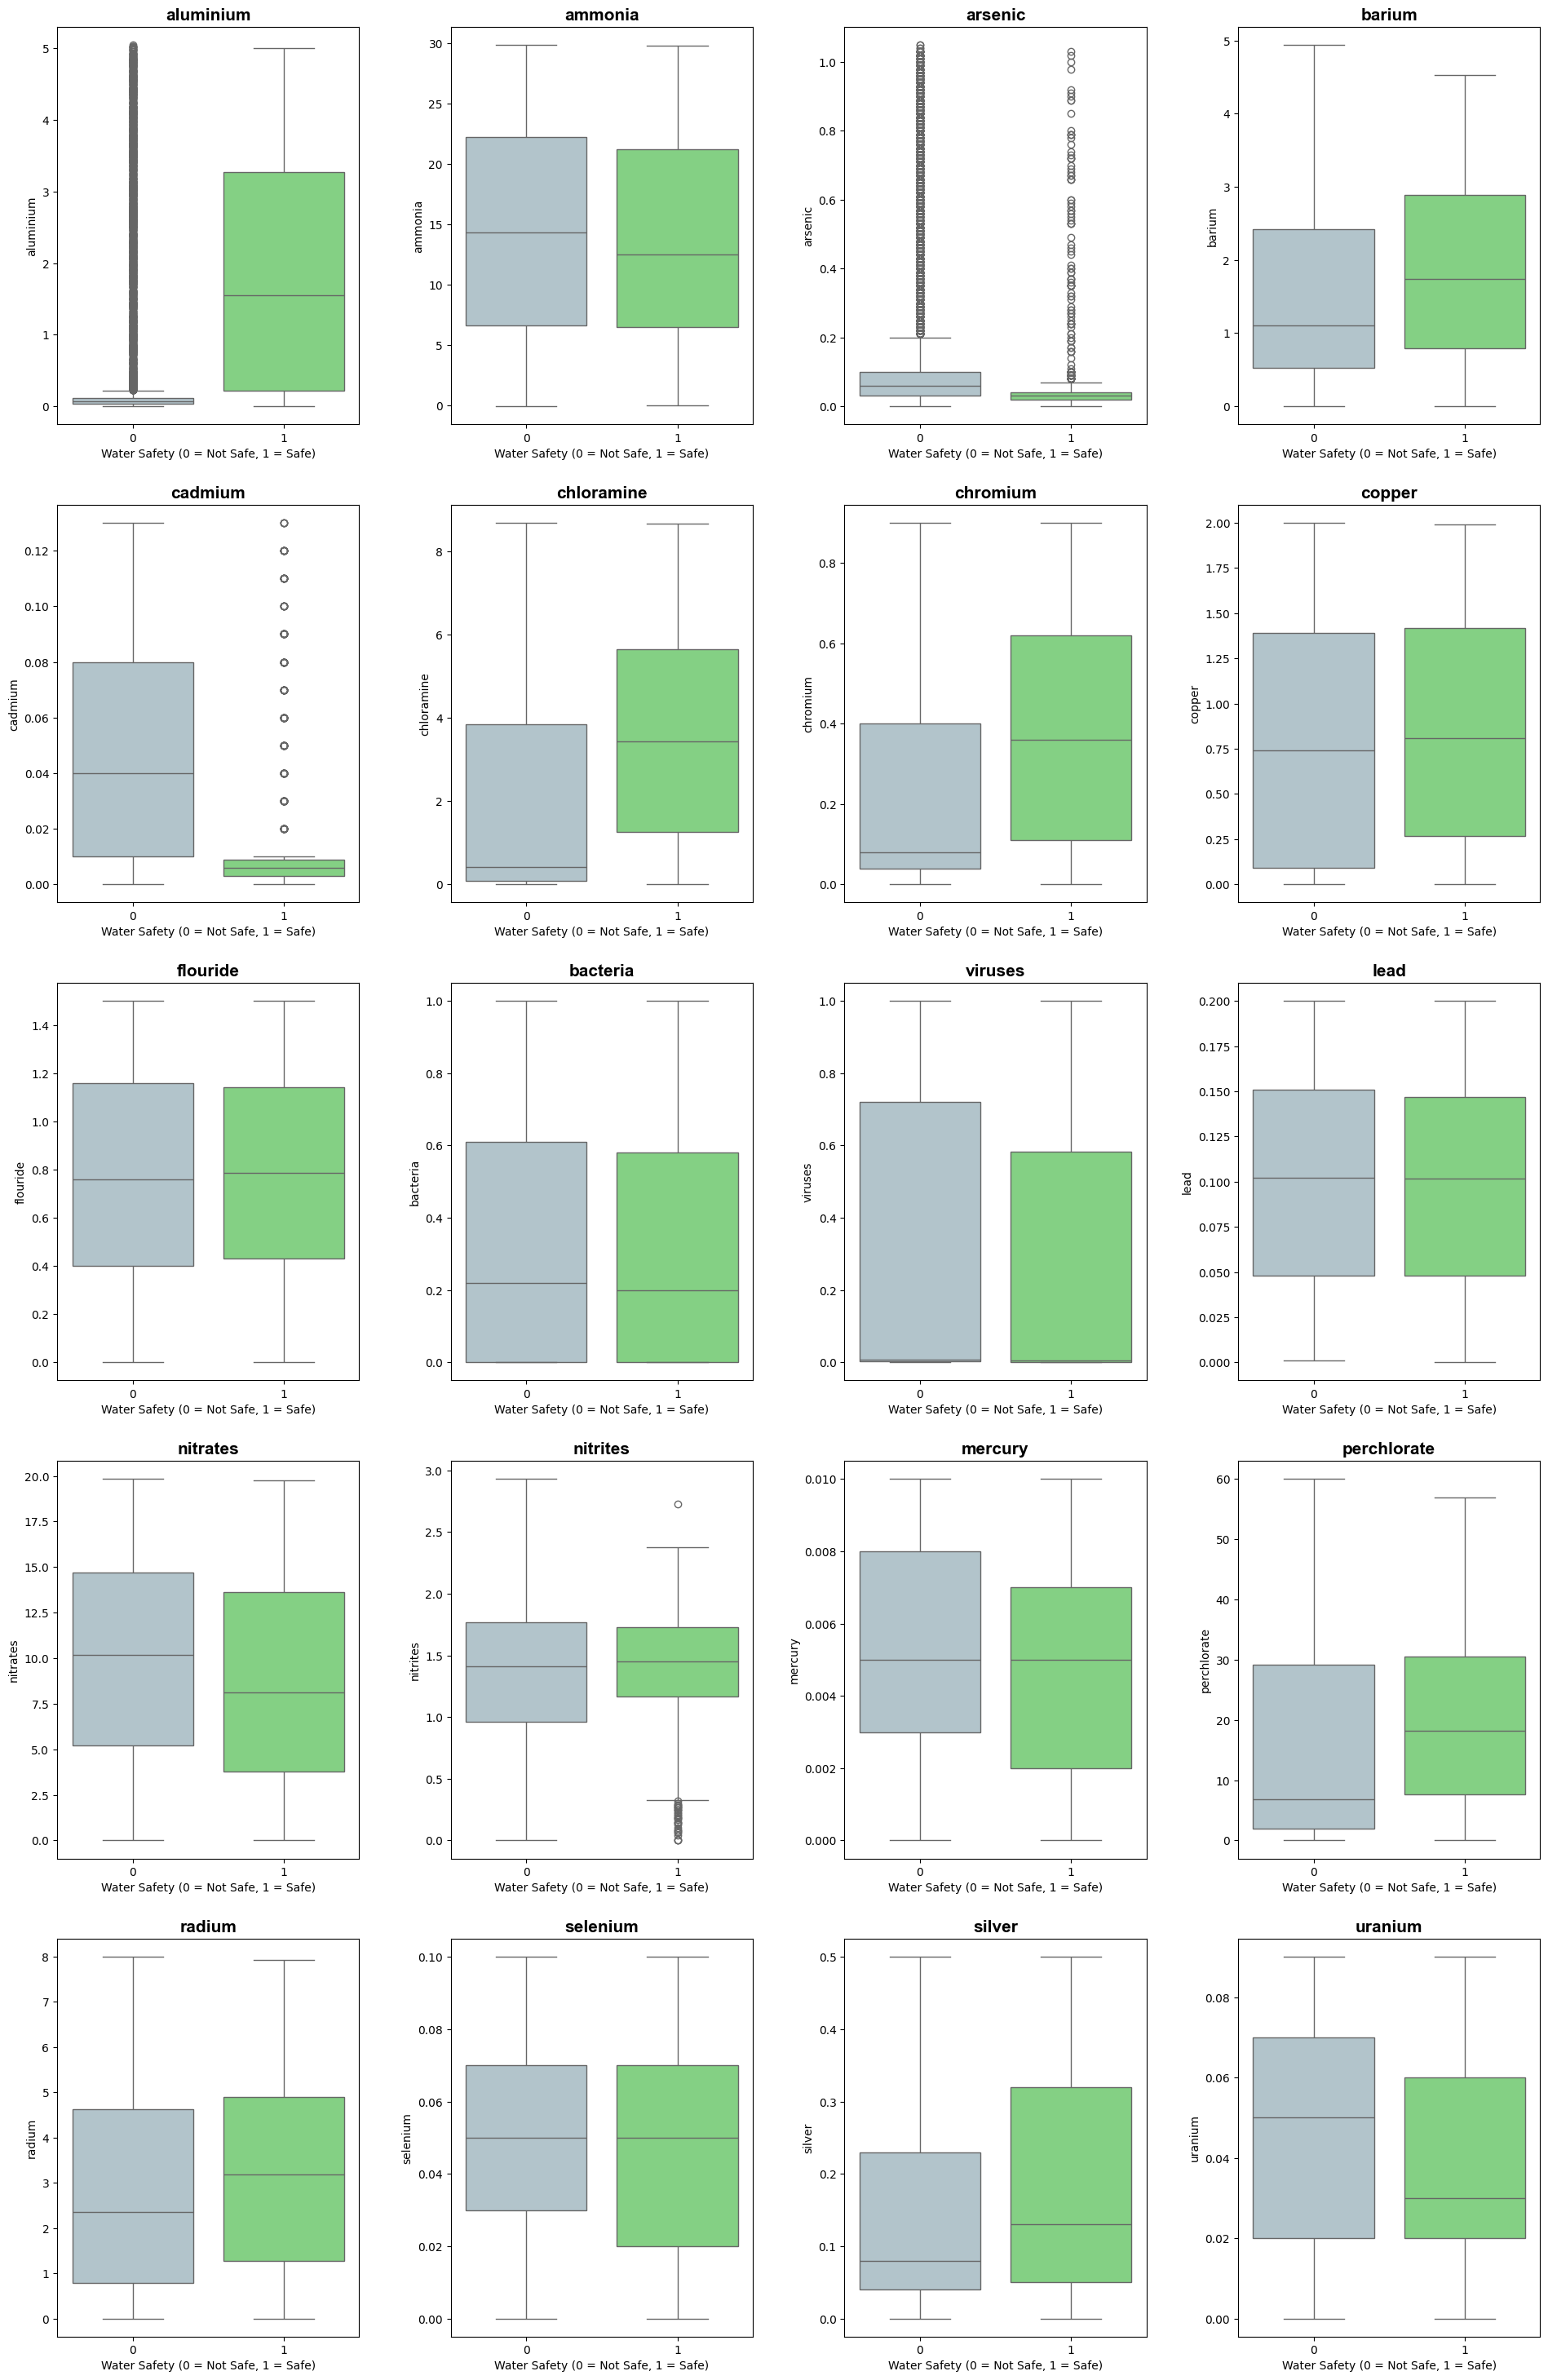

In [13]:
list_of_num_features = dataset.select_dtypes(include=[float, int]).columns.tolist()
list_of_num_features.remove('is_safe') 

num_plots = len(list_of_num_features)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols 

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 6))
fig.tight_layout(pad=5.0)  

axes = axes.flatten() 

palette = ['#aec6cf', '#77dd77']  

for ax, feature in zip(axes, list_of_num_features):
    sns.boxplot(x='is_safe', y=feature, data=dataset, hue='is_safe', palette=palette, ax=ax, legend=False)
    ax.set_title(feature, fontsize=15, fontweight='bold', fontname='Arial', ha='center') 
    ax.set_xlabel('Water Safety (0 = Not Safe, 1 = Safe)')

for ax in axes[num_plots:]:
    ax.axis('off')

plt.show()

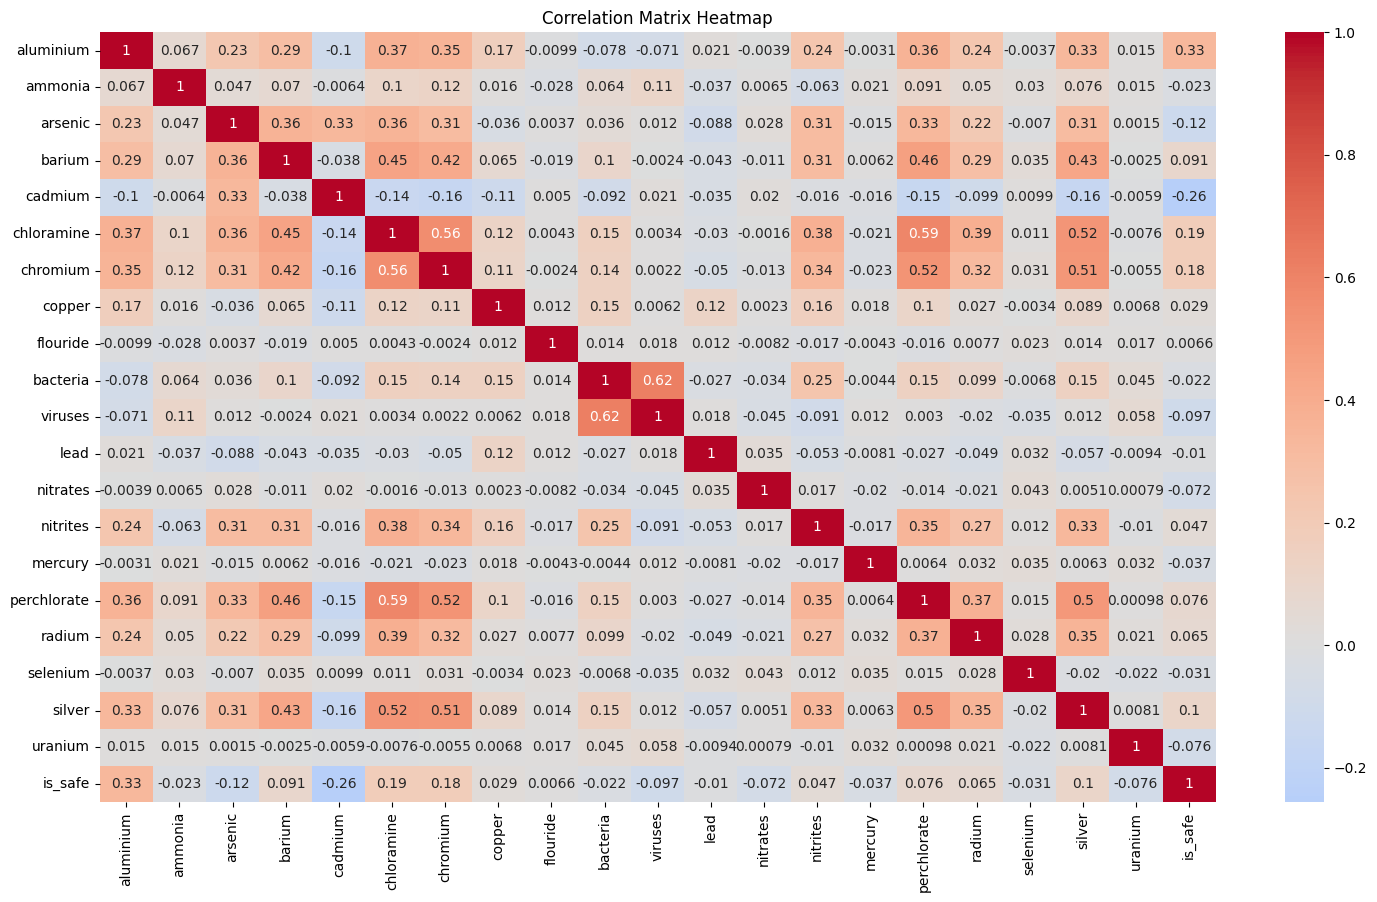

In [14]:
corr = dataset.corr()

plt.figure(figsize=(18, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
dataset['is_safe'].value_counts()

is_safe
0    7084
1     912
Name: count, dtype: int64

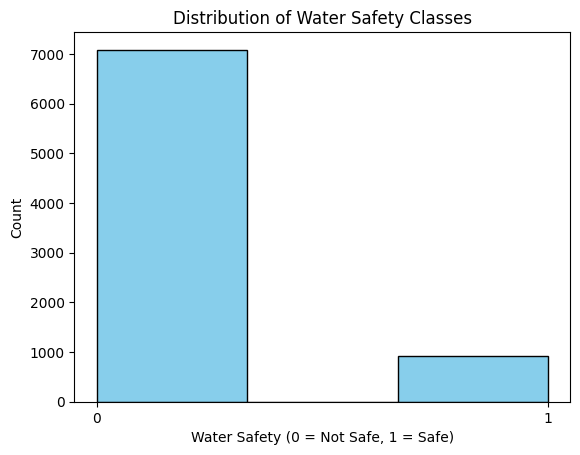

In [16]:
plt.hist(dataset['is_safe'], bins=3, edgecolor='black', color='skyblue')
plt.xlabel('Water Safety (0 = Not Safe, 1 = Safe)')
plt.ylabel('Count')
plt.title('Distribution of Water Safety Classes')
plt.xticks([0, 1])
plt.show()

- Since there is an imbalance for is_safe, the target variable of the dataset, I decided to use SMOTE method. With this method, I aimed to ensure that the minority class is better trained by the model and to eliminate the risk of losing important data. I think this practice is important to avoid biasing machine learning models.

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=100)

X = dataset.drop('is_safe', axis=1)
y = dataset['is_safe']

X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())

# Updating the new dataset by merging
dataset_resampled = pd.concat([X_resampled, y_resampled], axis=1)

is_safe
1    7084
0    7084
Name: count, dtype: int64


In [18]:
print(dataset_resampled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14168 entries, 0 to 14167
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    14168 non-null  float64
 1   ammonia      14168 non-null  float64
 2   arsenic      14168 non-null  float64
 3   barium       14168 non-null  float64
 4   cadmium      14168 non-null  float64
 5   chloramine   14168 non-null  float64
 6   chromium     14168 non-null  float64
 7   copper       14168 non-null  float64
 8   flouride     14168 non-null  float64
 9   bacteria     14168 non-null  float64
 10  viruses      14168 non-null  float64
 11  lead         14168 non-null  float64
 12  nitrates     14168 non-null  float64
 13  nitrites     14168 non-null  float64
 14  mercury      14168 non-null  float64
 15  perchlorate  14168 non-null  float64
 16  radium       14168 non-null  float64
 17  selenium     14168 non-null  float64
 18  silver       14168 non-null  float64
 19  uran

- Creating a single train-test split for preliminary experiments

In [19]:
from sklearn.model_selection import train_test_split

X_resampled = dataset_resampled.drop('is_safe', axis=1)
y_resampled = dataset_resampled['is_safe']

# Separation into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9917, 20) (4251, 20) (9917,) (4251,)


## Scailing

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

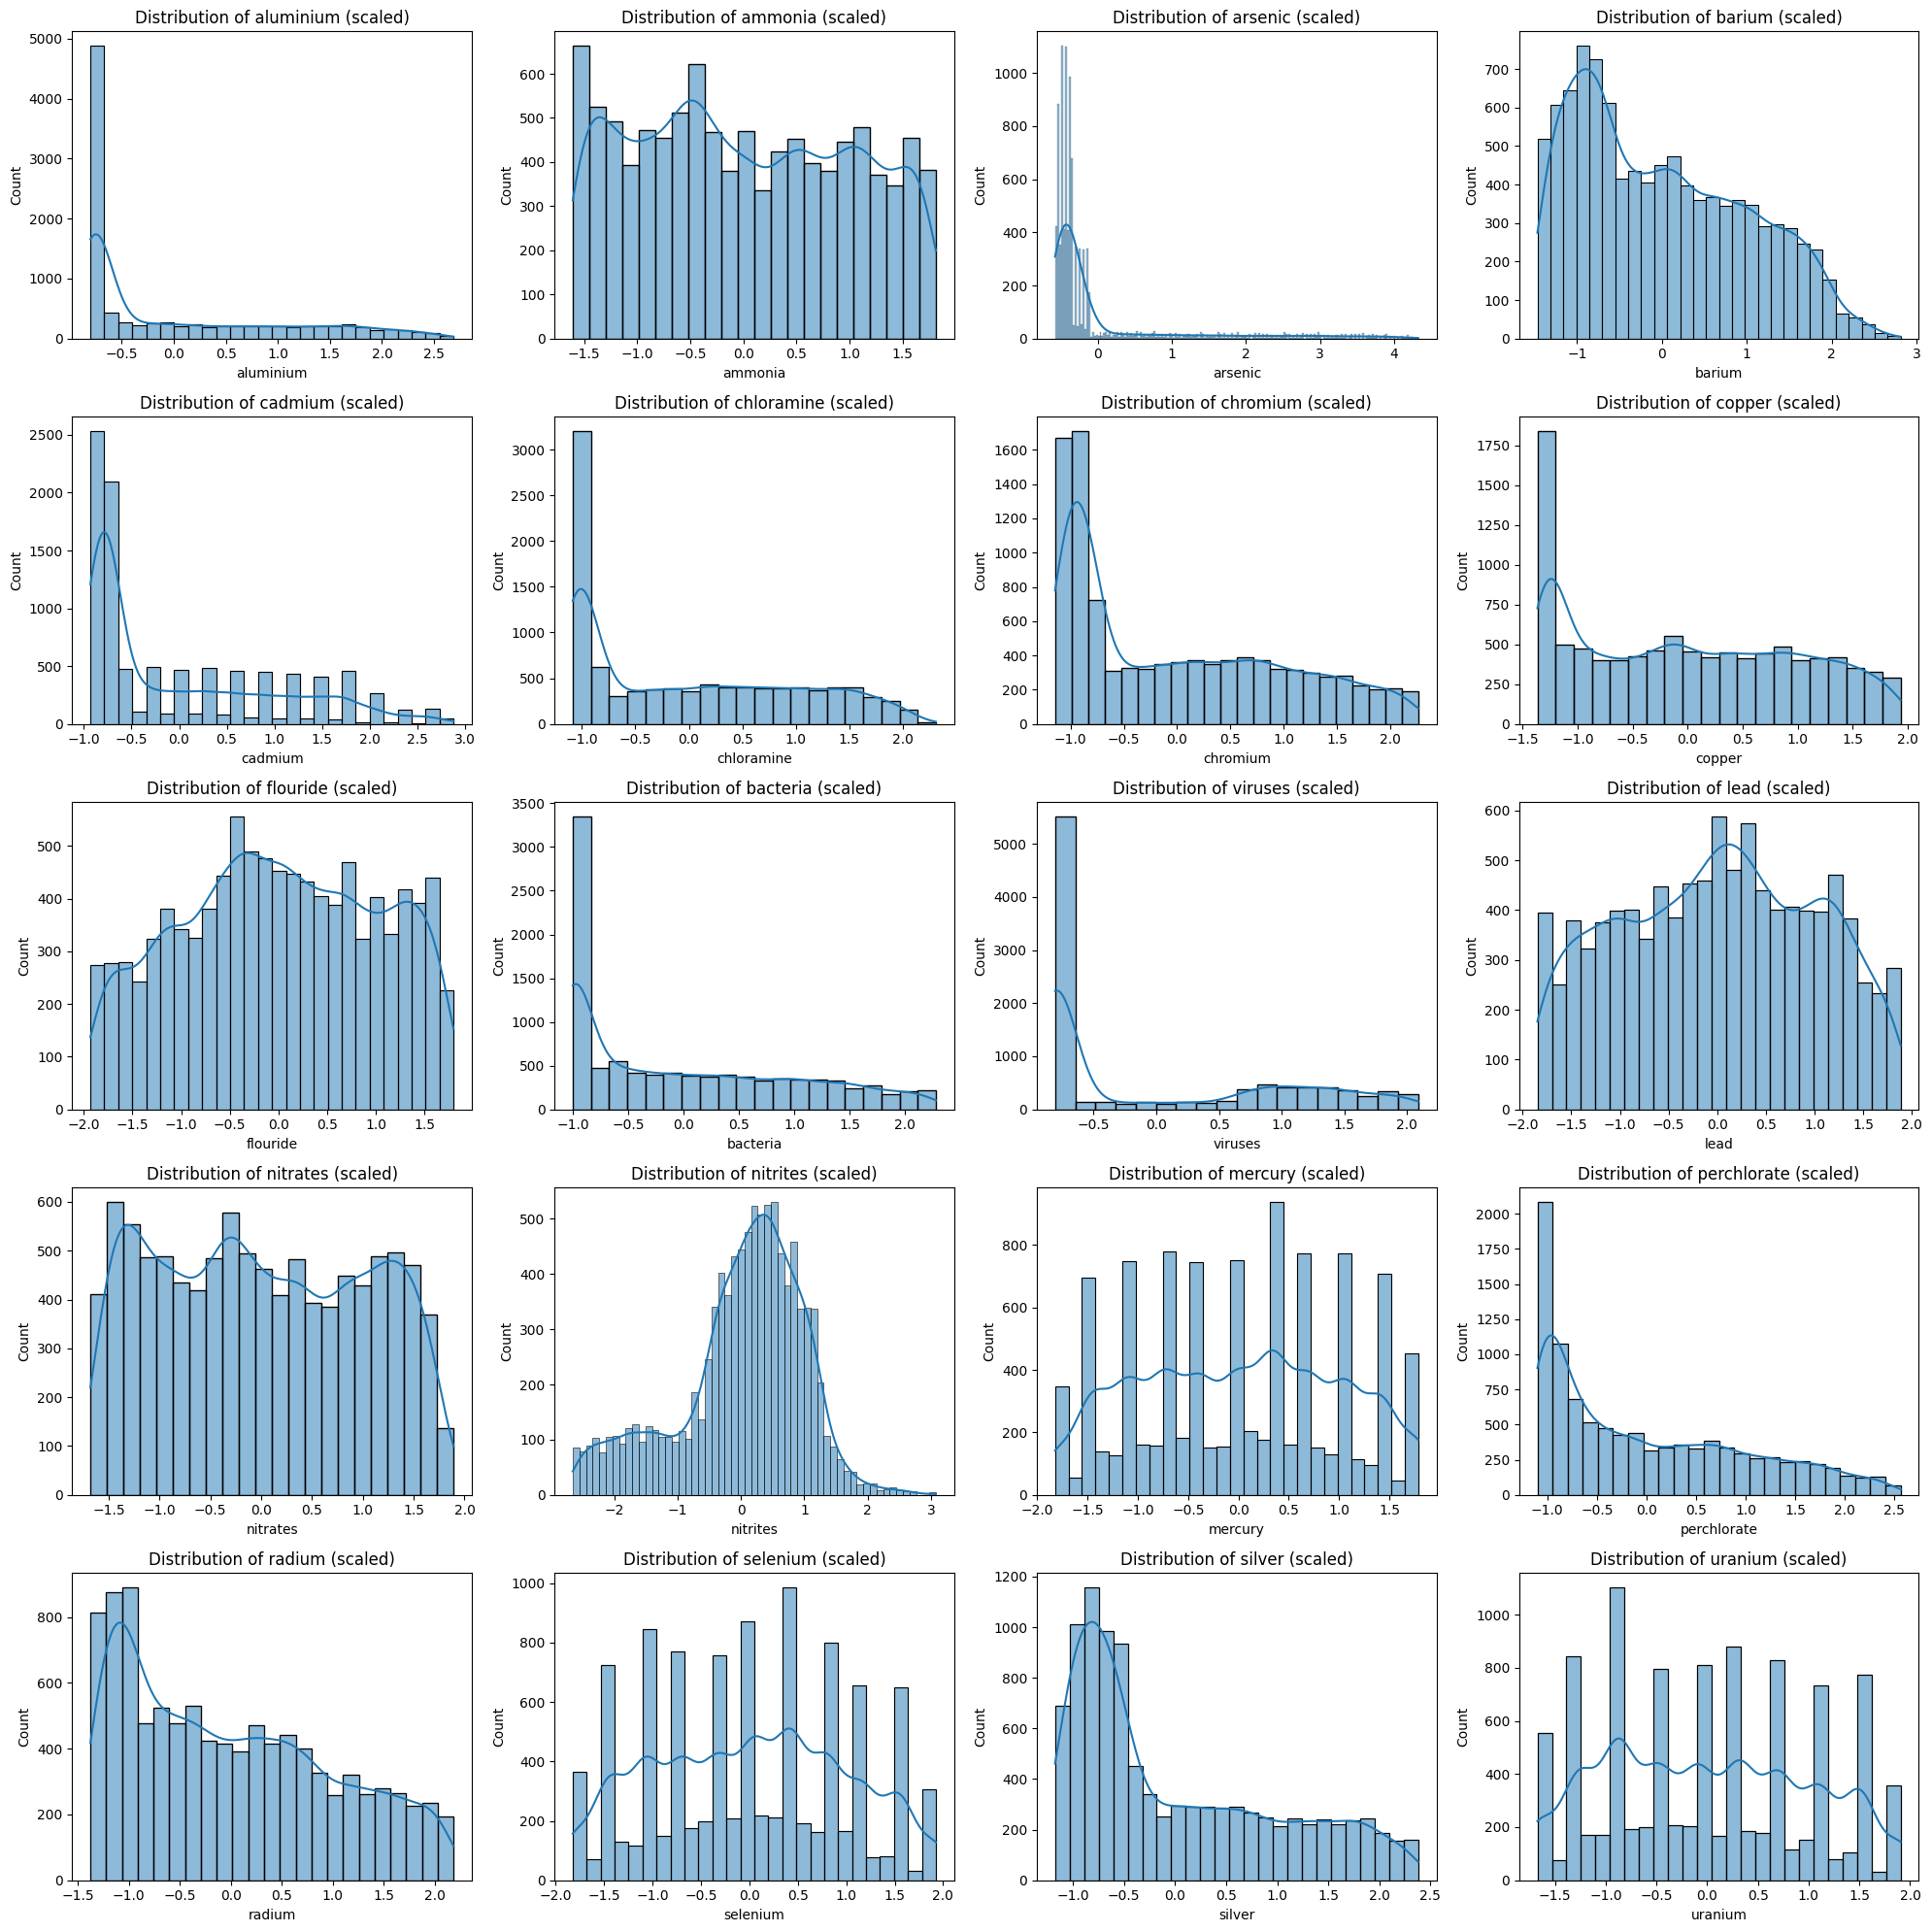

In [21]:
scaled_features = pd.DataFrame(X_train_scaled, columns=X_train.columns)

num_features = scaled_features.shape[1]
ncols = 4 
nrows = (num_features + ncols - 1) // ncols

plt.figure(figsize=(20, nrows * 4))
for i, col in enumerate(scaled_features.columns):  
    plt.subplot(nrows, ncols, i + 1)
    sns.histplot(scaled_features[col], kde=True)
    plt.title(f'Distribution of {col} (scaled)')
plt.tight_layout()
plt.show()

#  Task 5: A First Impression

### Simple Baseline

In [22]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train_scaled, y_train)

y_pred_baseline = baseline_model.predict(X_test_scaled)

# Baseline Model performance evaluating
print("Baseline Model (Majority Class) Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_baseline)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_baseline, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_baseline))

Baseline Model (Majority Class) Performance:
Accuracy: 0.497529992942837
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      2115
           1       0.00      0.00      0.00      2136

    accuracy                           0.50      4251
   macro avg       0.25      0.50      0.33      4251
weighted avg       0.25      0.50      0.33      4251

Confusion Matrix:
[[2115    0]
 [2136    0]]


**Comment:** The Baseline model has only predicted the majority class (class 0) due to class imbalance. This means that the model cannot predict the minority class (class 1) at all.

### 1. ML Algorithm: K-Nearest Neighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

# K-Nearest Neighbors performance evaluating
print("K-Nearest Neighbors Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

K-Nearest Neighbors Performance:
Accuracy: 0.8701482004234298
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.74      0.85      2115
           1       0.80      1.00      0.89      2136

    accuracy                           0.87      4251
   macro avg       0.90      0.87      0.87      4251
weighted avg       0.90      0.87      0.87      4251

Confusion Matrix:
[[1571  544]
 [   8 2128]]


### 2. ML Algorithm: Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)

# Decision Tree performance evaluating
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Performance:
Accuracy: 0.9543636791343213
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2115
           1       0.95      0.96      0.95      2136

    accuracy                           0.95      4251
   macro avg       0.95      0.95      0.95      4251
weighted avg       0.95      0.95      0.95      4251

Confusion Matrix:
[[1999  116]
 [  78 2058]]


**Comment:** According to the first impressions, the performance of the Decision Tree model is significantly superior to both the baseline model and the KNN model.

#   Task 6: Nested Cross Validation

**6.1 - Choose reasonable hyperparameter grids for the two ML algorithms chosen in Task 5**

As a result of the hyperparameters I have tried manually, the hyperparameters I find the most suitable are as follows:

In [25]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Hyperparameter grids
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

dt_param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

**6.2 - Optimize hyperparameters of these algorithms using a nested cross validation**

In [26]:
from sklearn.model_selection import StratifiedKFold

# Outer and inner cross-validation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# GridSearchCV for KNN and Decision Tree

knn = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=inner_cv, scoring='accuracy')

dt = DecisionTreeClassifier(random_state=42)
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=inner_cv, scoring='accuracy')

# Performing nested cross-validation
knn_nested_scores = cross_val_score(knn_grid_search, X_resampled, y_resampled, cv=outer_cv)
dt_nested_scores = cross_val_score(dt_grid_search, X_resampled, y_resampled, cv=outer_cv)

print(f"KNN Nested CV Accuracy: {knn_nested_scores.mean()} ± {knn_nested_scores.std()}")
print(f"Decision Tree Nested CV Accuracy: {dt_nested_scores.mean()} ± {dt_nested_scores.std()}")

KNN Nested CV Accuracy: 0.8813519262467924 ± 0.005390439542429298
Decision Tree Nested CV Accuracy: 0.9570863955683109 ± 0.00230410632987589


**6.3 - Compare train and test performance during the outer cross validation and interpret the results**

Comparing the training and testing performance of the models based on the nested cross-validation results, I conclude that the Decision Tree model generally outperforms the KNN model with higher accuracy and lower variance. In conclusion, the performance of the Decision Tree model is slightly higher and more consistent than the KNN model.

**6.4 - Compare your final performance estimates of the algorithms and the baseline in a table using more than just one performance metrics**

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score
from tabulate import tabulate

# Fitting models on the entire training data
knn_grid_search.fit(X_resampled, y_resampled)
dt_grid_search.fit(X_resampled, y_resampled)

# Evaluating models on the test set
knn_best_model = knn_grid_search.best_estimator_
dt_best_model = dt_grid_search.best_estimator_

X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_resampled.columns)

# Predictions
y_pred_knn = knn_best_model.predict(X_test_scaled)
y_pred_dt = dt_best_model.predict(X_test_scaled)

# Performance metrics for baseline
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_precision = precision_score(y_test, y_pred_baseline, average='weighted', zero_division=0)
baseline_recall = recall_score(y_test, y_pred_baseline, average='weighted', zero_division=0)
baseline_f1 = f1_score(y_test, y_pred_baseline, average='weighted', zero_division=0)

# Performance metrics for KNN 
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

# Performance metrics for  Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

results = {
    'Model': ['Baseline', 'KNN', 'Decision Tree'],
    'Accuracy': [baseline_accuracy, knn_accuracy, dt_accuracy],
    'Precision': [baseline_precision, knn_precision, dt_precision],
    'Recall': [baseline_recall, knn_recall, dt_recall],
    'F1-Score': [baseline_f1, knn_f1, dt_f1]
}

results_df = pd.DataFrame(results)

print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))

+---------------+--------------------+---------------------+---------------------+--------------------+
|     Model     |      Accuracy      |      Precision      |       Recall        |      F1-Score      |
+---------------+--------------------+---------------------+---------------------+--------------------+
|   Baseline    | 0.497529992942837  | 0.24753609387769943 |  0.497529992942837  | 0.3305925023795477 |
|      KNN      | 0.4653022818160433 | 0.4671777671298515  | 0.45646067415730335 | 0.4617570447549136 |
| Decision Tree | 0.7365325805692778 | 0.8346508563899868  | 0.5931647940074907  | 0.6934865900383141 |
+---------------+--------------------+---------------------+---------------------+--------------------+


**6.5 - Compare average performance and standard deviation**

In [28]:
print(f"Average performance for KNN: {knn_nested_scores.mean().round(2)}")
print(f"Std. deviation for KNN: {knn_nested_scores.std().round(4)}")

print(f"Average performance for Decision Tree: {dt_nested_scores.mean().round(2)}")
print(f"Std. deviation for Decision Tree: {dt_nested_scores.std().round(4)}")

Average performance for KNN: 0.88
Std. deviation for KNN: 0.0054
Average performance for Decision Tree: 0.96
Std. deviation for Decision Tree: 0.0023


**Comment:** It can be said that the Decision Tree model has a higher average accuracy than the KNN model and, also this model shows a lower variability in accuracy.

**Result:** The decision tree model is preferable as it has achieved a higher average accuracy than the cross-validation results and the variability in accuracy is lower. This indicates that the model performs more consistently overall and provides a given level of accuracy more consistently. Therefore, it makes sense to favour the Decision Tree model when assessing model performance on the dataset.

#  Task 7: Analysis of the Final Model

In [29]:
report = classification_report(y_test, y_pred_dt, target_names=['0 - unsafe', '1 - safe'], output_dict=True)

report_df = pd.DataFrame(report).transpose()

print(report_df)

              precision    recall  f1-score      support
0 - unsafe     0.682034  0.881324  0.768977  2115.000000
1 - safe       0.834651  0.593165  0.693487  2136.000000
accuracy       0.736533  0.736533  0.736533     0.736533
macro avg      0.758343  0.737244  0.731232  4251.000000
weighted avg   0.758720  0.736533  0.731045  4251.000000


- According to this evaluation, the precision value for the class ‘0 - unsafe’ is lower than for the class ‘1 - safe’, but the recall value is higher. This indicates that the ability to predict the ‘unsafe’ class is more balanced, i.e. a higher percentage of correct predictions are made, but at the same time some unsafe instances are missed.

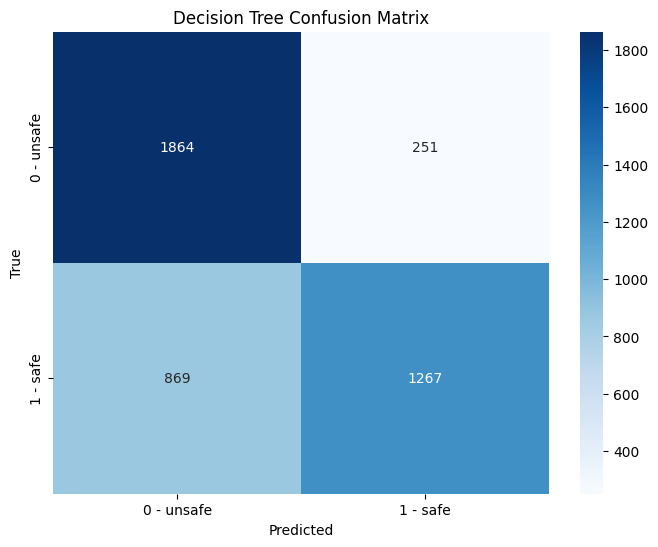

In [30]:
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['0 - unsafe', '1 - safe'], 
            yticklabels=['0 - unsafe', '1 - safe'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')
plt.show()

- For unsafe class (0) guessed 1864 correctly and 251 incorrectly.
- For safe class (1) guessed 1267 correctly and 869 incorrectly.

**As a result, the model tends to better predict the “unsafe” class, but also performs acceptably in the “safe” class.**

#  Task 8: Feature Importance

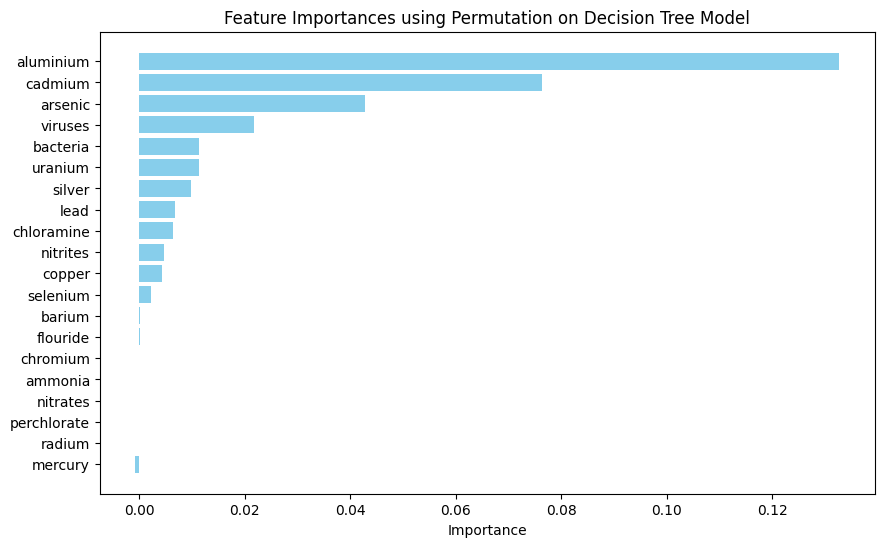

In [31]:
from sklearn.inspection import permutation_importance

result = permutation_importance(dt_best_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

feature_importances = pd.DataFrame(result.importances_mean, index=X_test_scaled.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances using Permutation on Decision Tree Model')
plt.gca().invert_yaxis() 
plt.show()

- As seen in the diagram; 'aluminium', 'cadmium', 'arsenic' and 'viruses' are the 4 features that have the most important impact on water safety classification. 
- In addition, it can be said that the importance of the following 8 features is more important than the last 8 features.

#  Task 9: Conclusions and Future Work

### 9.1 - Summarize and interpret the achieved results

In this project, I developed a classification model that predicts whether water is safe or unsafe in order to monitor urban water quality and protect public health. In particular, it is aimed to determine whether water is safe (1) or unsafe (0) based on the concentrations of harmful substances.

**Baseline Model:** The baseline model (Dummy Classifier) resulted in an accuracy of approximately 50%, indicating this approach performs at a random guess level.

**KNN Model:** The K-Nearest Neighbors model achieved a nested cross-validation accuracy of about 88.14% with a standard deviation of 0.54%.

**Decision Tree Model:** The Decision Tree model achieved a nested cross-validation accuracy of about 95.71% with a standard deviation of 0.23%.

**Final Performance:** On the test set, the Decision Tree model outperformed the KNN model with an accuracy of 73.65%, precision of 83.47%, recall of 59.32%, and an F1-score of 69.35%. The Decision Tree model was selected as the final model because of its superior performance in accuracy, precision, recall, and F1-score compared to the KNN model.


### 9.2 - Critically reflect and assess the usability of the applied methodology in the context of your task

The methodology applied is suited to the task of predicting the safety of water. Steps such as data preprocessing, model selection with nested cross-validation and hyperparameter optimisation ensured that the model performed accurately and reliably. In particular, resampling to address class imbalance (SMOTE) and scaling steps helped the models to perform in a balanced manner.

### 9.3 - Explain the generated value within the context of your task

The value of this work is the ability to predict with high accuracy whether water is safe. This is critical to protecting public health, ensuring effective management of water resources and increasing public confidence in access to clean water. The model's accurate predictions will allow for faster and more effective decisions in water quality monitoring and response.

### 9.4 - Explain limitations and pitfalls and critically discuss the employed methodology (your choices as well as the choices given in these tasks). What could or even should have been done differently?

Models such as Decision Trees run the risk of overlearning. Although pruning techniques were used, the performance of the model could have been improved with further modifications. For example, when I first used the Over Sampling method in the resampling section, the model's performance was low, so I made a change to improve the performance by using the SMOTE method.

### 9.5 - Propose ideas for future work

**Hyperparameter Optimisation:** A more comprehensive hyperparameter optimisation technique can be used. Better tuned hyperparameters can improve the accuracy of the model. This means more accurate classifications.

**Feature Selection:** Feature selection methods can be applied to identify the most informative features. Using only the most informative features can improve the accuracy and performance of the model. Removing unnecessary features reduces the risk of overlearning the model and provides better generalisation.

